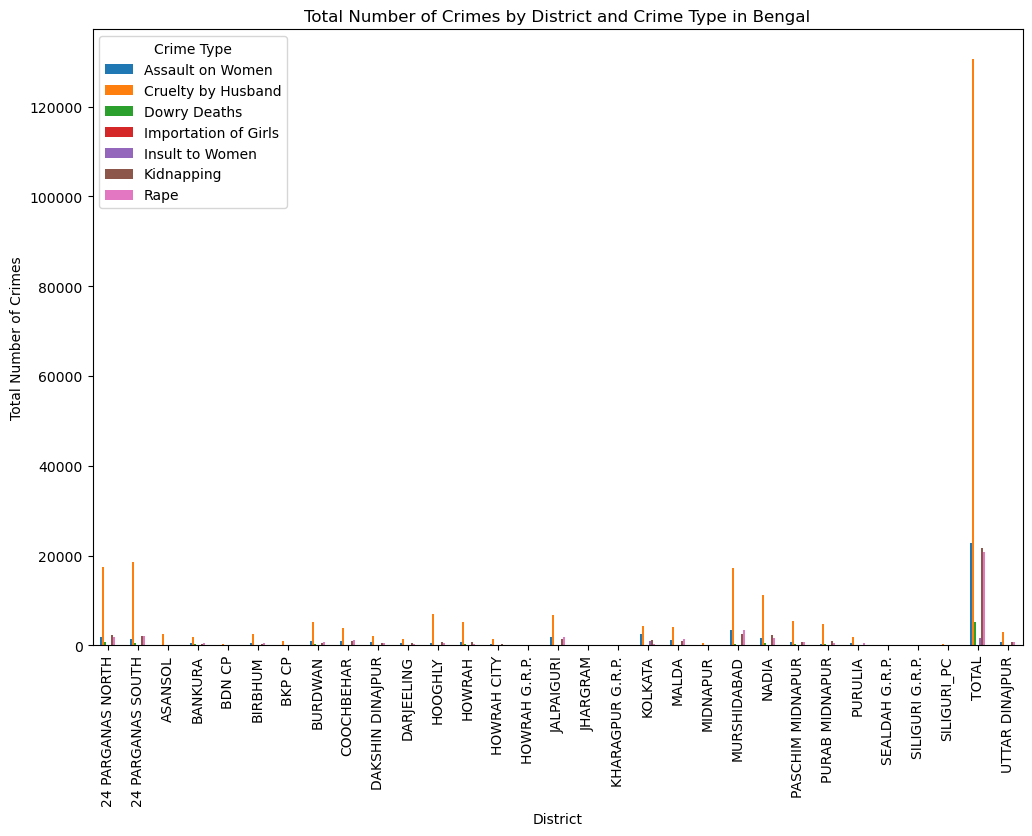

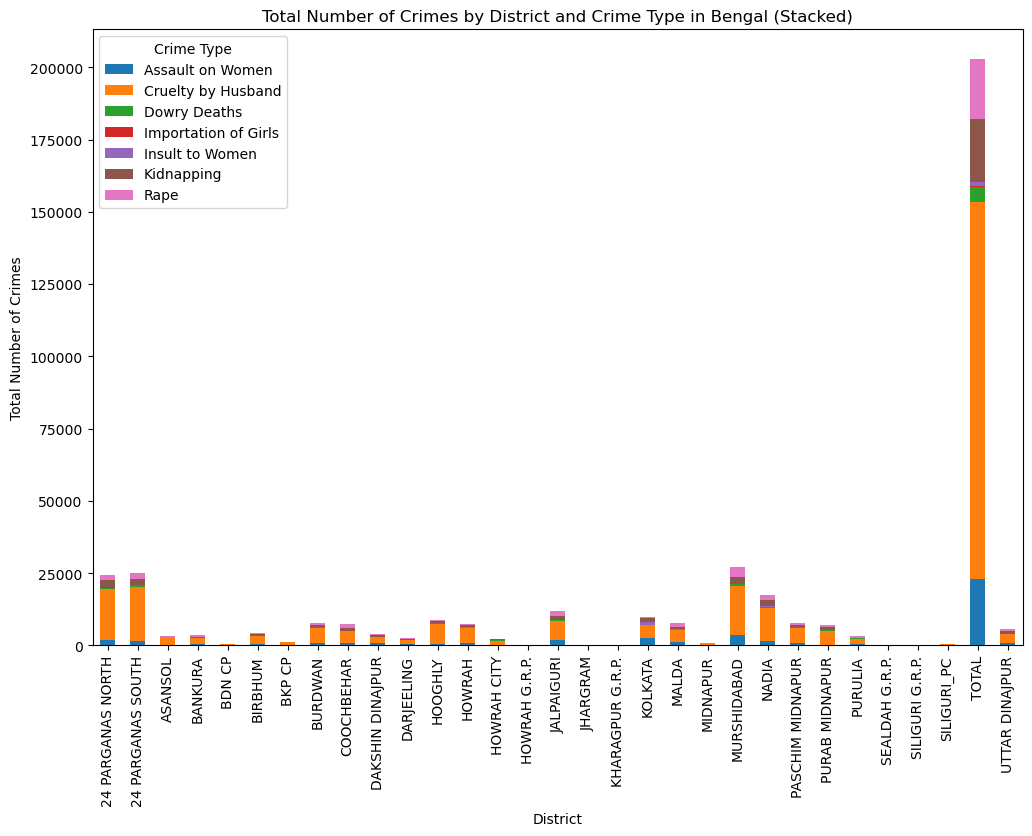

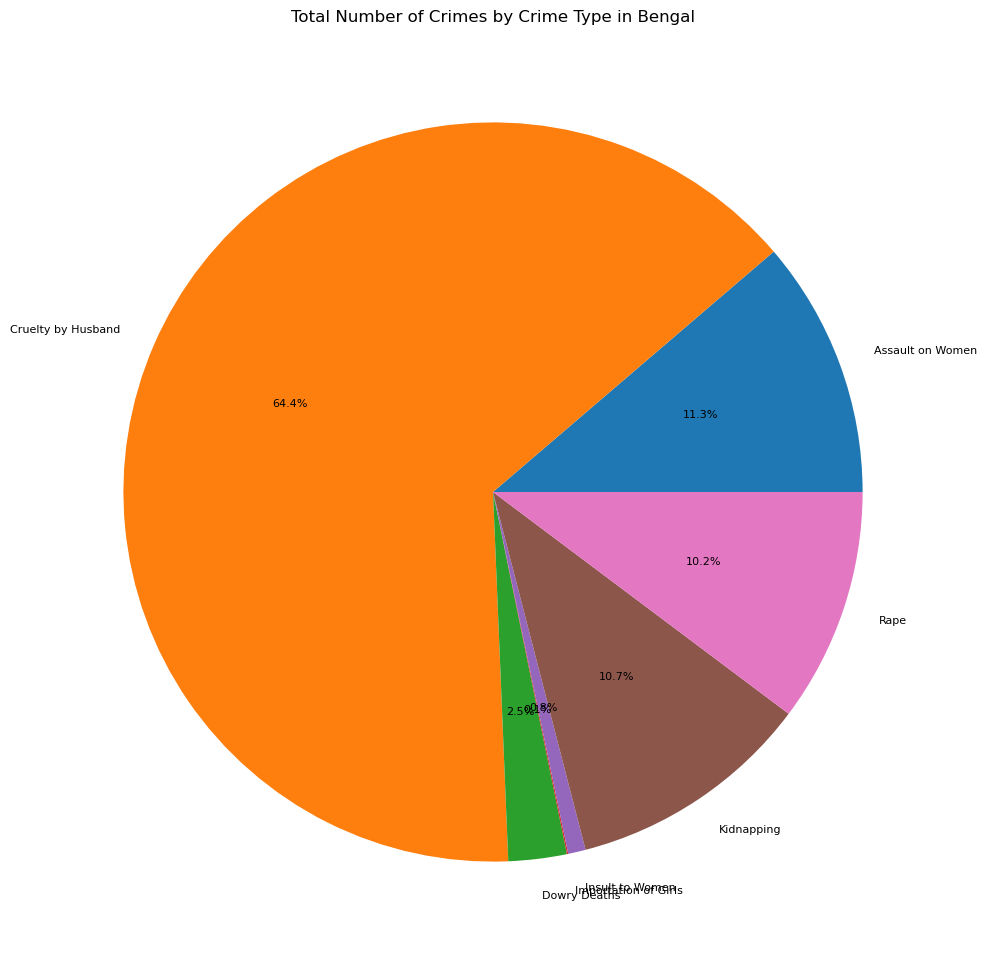

Text(0.5, 1.0, 'Distribution of Total Number of Crimes by Crime Type in Bengal')

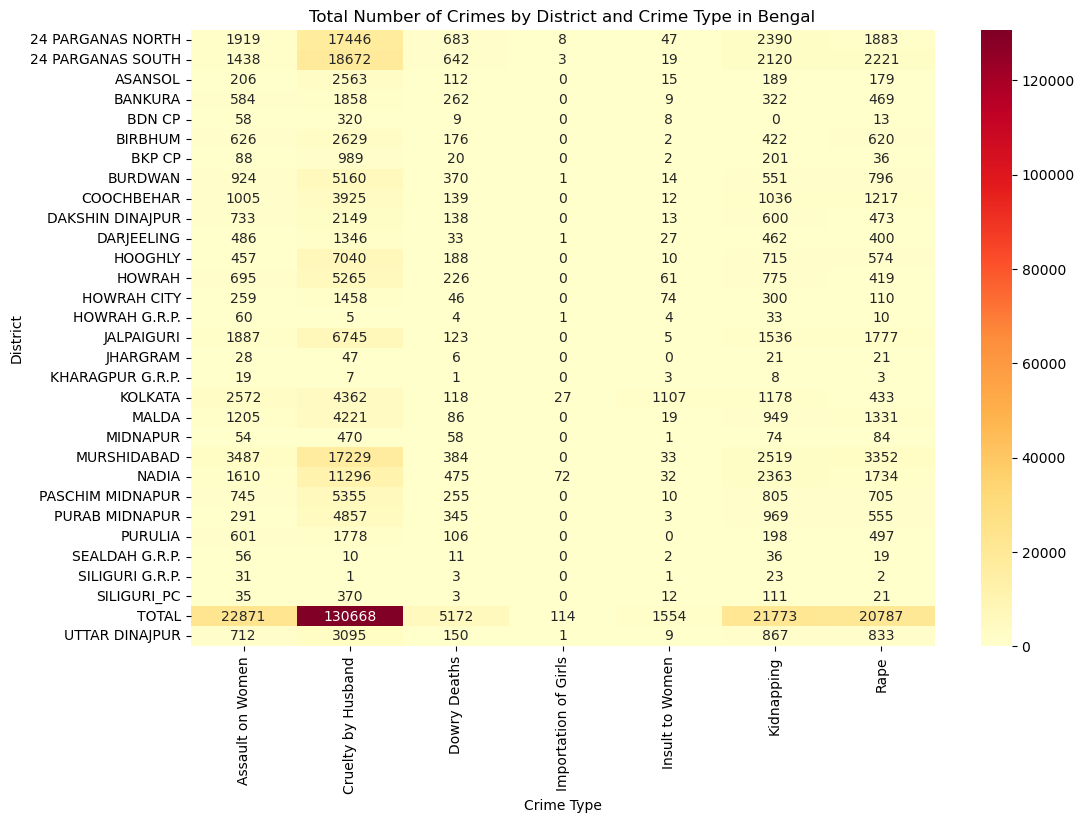

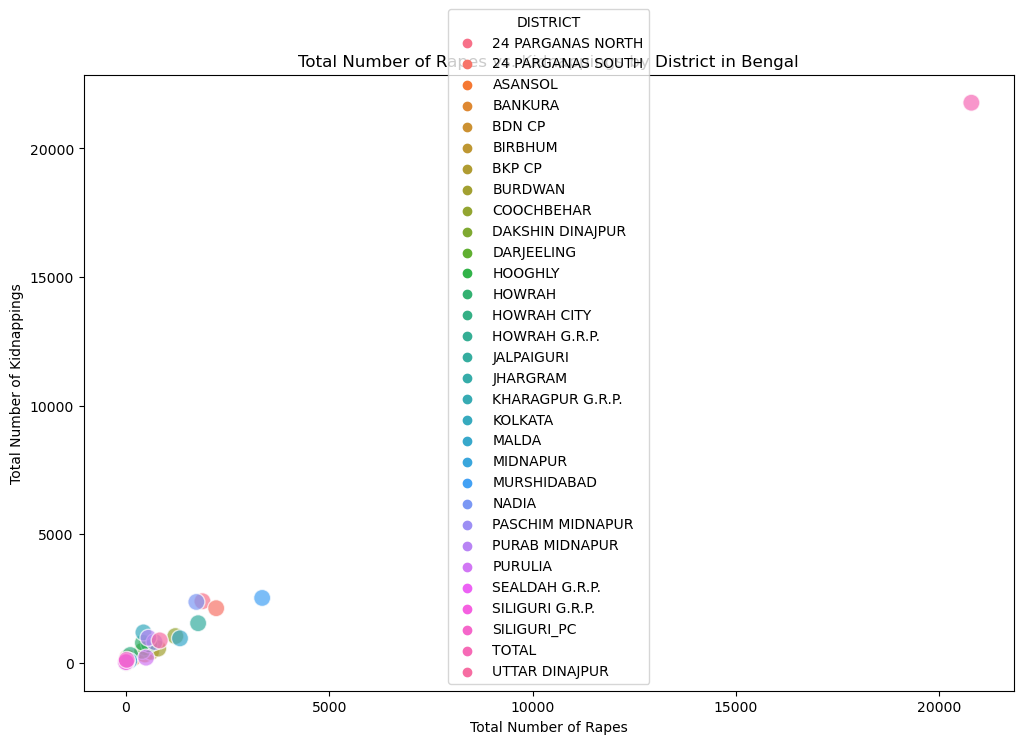

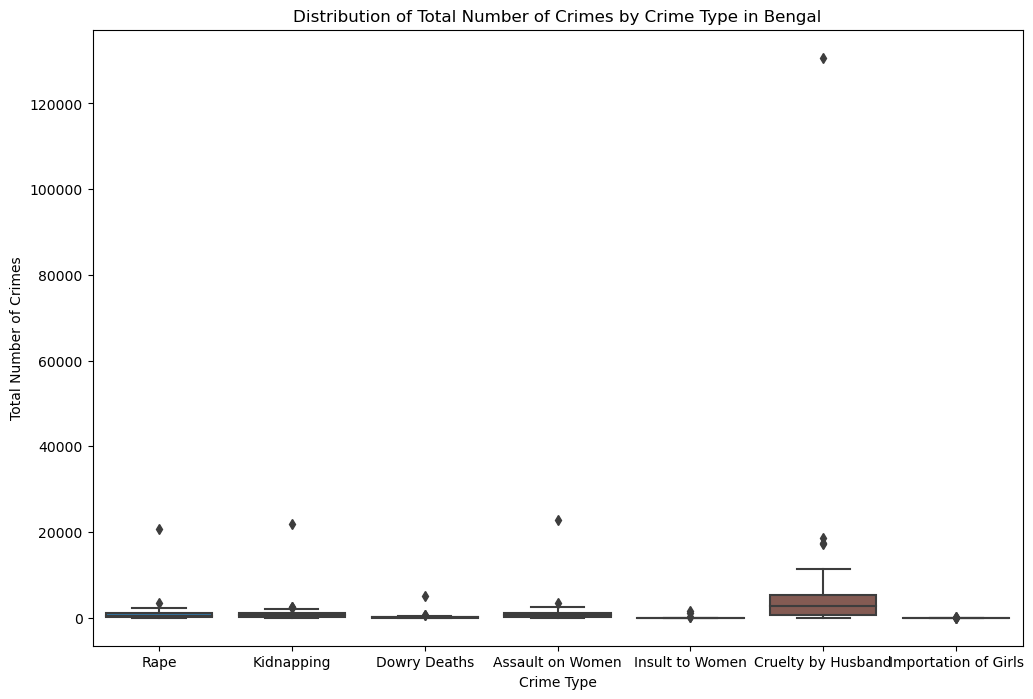

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = pd.read_csv('india-crime.csv')


Bengal_data = crime_data.loc[crime_data['STATE/UT'] == 'WEST BENGAL'].copy()


Bengal_data.rename(columns={'Kidnapping and Abduction': 'Kidnapping', 'Assault on women with intent to outrage her modesty': 'Assault on Women', 'Insult to modesty of Women': 'Insult to Women', 'Cruelty by Husband or his Relatives': 'Cruelty by Husband'}, inplace=True)


group_columns = ['DISTRICT', 'Rape', 'Kidnapping', 'Dowry Deaths', 'Assault on Women', 'Insult to Women', 'Cruelty by Husband', 'Importation of Girls']


grouped_data = Bengal_data[group_columns].groupby('DISTRICT').sum().reset_index()


melted_data = grouped_data.melt(id_vars=['DISTRICT'], var_name='Crime Type', value_name='Count')


fig, ax = plt.subplots(figsize=(12, 8))
melted_data.pivot(index='DISTRICT', columns='Crime Type', values='Count').plot(kind='bar', ax=ax)
ax.set_xlabel('District')
ax.set_ylabel('Total Number of Crimes')
ax.set_title('Total Number of Crimes by District and Crime Type in Bengal')


fig, ax = plt.subplots(figsize=(12, 8))
melted_data.pivot(index='DISTRICT', columns='Crime Type', values='Count').plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('District')
ax.set_ylabel('Total Number of Crimes')
ax.set_title('Total Number of Crimes by District and Crime Type in Bengal (Stacked)')


fig, ax = plt.subplots(figsize=(20, 12))
melted_data.groupby(['Crime Type'])['Count'].sum().plot(kind='pie', ax=ax, autopct='%1.1f%%', textprops={'fontsize': 8})
ax.set_title('Total Number of Crimes by Crime Type in Bengal')
ax.set_ylabel('')

plt.show()

# Pivot the melted data to create a matrix of total crimes by district and crime type
crime_matrix = melted_data.pivot(index='DISTRICT', columns='Crime Type', values='Count')


fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(crime_matrix, cmap='YlOrRd', annot=True, fmt='.0f', ax=ax)
ax.set_xlabel('Crime Type')
ax.set_ylabel('District')
ax.set_title('Total Number of Crimes by District and Crime Type in Bengal')

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Rape', y='Kidnapping', hue='DISTRICT', data=grouped_data, s=150, alpha=0.7, ax=ax)
ax.set_xlabel('Total Number of Rapes')
ax.set_ylabel('Total Number of Kidnappings')
ax.set_title('Total Number of Rapes vs. Kidnappings by District in Bengal')

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Crime Type', y='Count', data=melted_data, ax=ax)
ax.set_xlabel('Crime Type')
ax.set_ylabel('Total Number of Crimes')
ax.set_title('Distribution of Total Number of Crimes by Crime Type in Bengal')
